# Miniproyecto 1 - Adquisición de datos y aplicación de técnicas de preprocesamiento para resolver un problema particular
**Autores:**  
* Jackeline Morales Hernandez

* Jose David Ortiz Miranda

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

In [1]:
## Librerias Importantes
import scipy.io as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import signal
from scipy.signal import find_peaks
import scipy.signal as signal
from __future__ import division
from numpy import abs, sum, linspace
from numpy.fft import rfft
import pandas as pd
from scipy.signal import butter, lfilter, filtfilt, sosfilt, find_peaks

In [2]:
datosP1 = sc.loadmat('s14.mat')

In [3]:
signals = datosP1['data']
etiquetas = datosP1['labels']
# Esto me arrojará un nd array de n_video * id_signal * Ntimepoints

# 1. Extracción de características

Para extraer las características, se deben recorrer los 40 videos o escenarios de prueba, procesarlos y almacenar el resultado de cada uno como un elemento de una matriz $\boldsymbol{X_{new}} \in {\mathbb{R}}^{N \times D}$ donde N es el número de observaciones (en este caso las realizaciones emocionales), y D es el número de características resultantes en el proceso de extracción.

## 1.1 RESISTENCIA GALVANICA DE LA PIEL (GSR)
### De esta señal extreremos las siguientes caracteristicas:
- Promedio de la resistencia de la piel.
- Número de mínimos locales en la señal GSR.
- Diez potencia espectral en las bandas [0 - 2.4] Hz.

### 1.1.1 Promedio de la resistencia de la piel.

In [4]:
GSR_Total = []
for i in range(40):
    GSR = signals[i,36,:]
    GSR_promedio=np.mean(GSR)
    GSR_Total.append(GSR_promedio)


### 1.1.2 Numero de minimos locales de la señal GSR.

In [5]:
for i in range(40):
    GSR = signals[i,36,:]
    GSR_num_min,_=find_peaks(-GSR,distance=128)
    min_locales = len(GSR_num_min)
    #GSR_Total.append(min_locales)
print(min_locales)

15


In [6]:
from scipy.signal import argrelextrema
GSR = signals[0,36,:]
GSR_num_min,_=find_peaks(-GSR,distance=128)
min_locales = len(GSR_num_min)
print(min_locales)

13


C:\Users\Admin\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


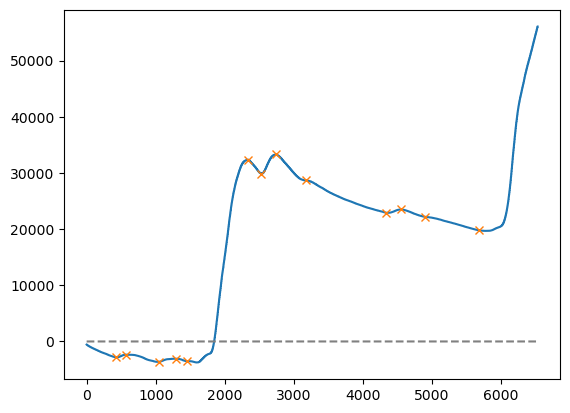

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
x = signals[0,36,:]
peaks, _ = find_peaks(-x,distance=128)
plt.plot(-x)
plt.plot(peaks, -x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
#plt.xlim(600,700)
plt.show()


### 1.1.3 Diez potencias espectrales en las bandas [0 - 2.4] Hz.

In [8]:
GSR_Total = []
for i in range(40):
    GSR = signals[i,36,:]
    GSR_promedio=np.mean(GSR)
    GSR_Total.append(GSR_promedio)
    GSR_num_min,_=find_peaks(-GSR, distance = 128)
    min_locales = len(GSR_num_min)
    GSR_Total.append(min_locales)
    # Definir los parámetros del filtro pasa banda (0.0-2.4 Hz)
    freq_min = 0.0001
    freq_max = 2.4
    freq_min_nor = freq_min / 128
    freq_max_nor = freq_max / 128
    # Diseñar el filtro pasa banda
    sos = butter(N=4, Wn=[freq_min_nor, freq_max_nor], btype='band',output = 'sos')
    # Aplicar el filtro pasa banda a la señal de GSR
    GSR_filtrada = sosfilt(sos, GSR) # Inicializar la matriz filtrada
    # Calcular la FFT de la señal filtrada
    fft_resultado = np.fft.fft(GSR_filtrada)
    frecuencias = np.fft.fftfreq(len(fft_resultado), 1/128)

    # Calcula las potencias espectrales en la banda de 0 a 2.4 Hz
    potencias_banda = np.abs(fft_resultado)**2
    # Toma las 10 primeras potencias
    diez_potencias = np.argsort(potencias_banda)[::-1][:10]
    top_10_potencias = potencias_banda[diez_potencias]
    GSR_Total.append(top_10_potencias)
    diez_freq = frecuencias[diez_potencias]
    GSR_Total.append(diez_freq)
     #Crea un nuevo vector para ordenar todos sus datos
GSR_signal = []

  # Recorre los elementos del vector original y agrega los valores a nuevo_vector
for elemento in GSR_Total:
    if isinstance(elemento, (int, float)):
          # Si es un número, agrégalo directamente a nuevo_vector
        GSR_signal.append(elemento)
    elif isinstance(elemento, tuple) and len(elemento) == 2:
          # Si es una tupla con 2 elementos, convierte los elementos a listas y agrega a nuevo_vector
        GSR_signal.extend(list(elemento[0]))
        GSR_signal.extend(list(elemento[1]))
    elif isinstance(elemento, np.ndarray) and elemento.ndim == 1:
          # Si es un array de una dimensión, conviértelo a lista y agrégalo a nuevo_vector
        GSR_signal.extend(elemento.tolist())

  # Ahora, nuevo_vector contendrá los datos organizados en una lista plana
GSR_signal = np.array(GSR_signal).reshape(-1)
GSR_signal=np.array(GSR_signal).reshape(40,22)

### 1.2 PLETISMOGRAFIA O VOLUMEN DE LA PRESION SANGUINEA
### De esta señal extreremos las siguientes caracteristicas:
- Media y desviación estándar de la frecuencia cardiaca.
- Espectro de potencia en las bandas de 0.2 a 0.3 Hz.
- La variabilidad de la frecuencia cardíaca HRV

### 1.2.1 Media y desviación estándar de la frecuencia cardiaca.

In [9]:
for i in range(40):
    pleth = signals[i,38,:]
    pleth_media=np.mean(pleth)
for i in range(40):
    pleth = signals[i,38,:]
    pleth_std_des=np.std(pleth)

### 1.2.2 Espectro de potencia en las bandas de 0.2 a 0.3 Hz.

In [10]:
pleth_Total = []
for i in range(40):
  pleth = signals[i,38,:]
  pleth_media=np.mean(pleth)
  pleth_Total.append(pleth_media)
  pleth_std_des=np.std(pleth)
  pleth_Total.append(pleth_std_des)
  # Definir los parámetros del filtro pasa banda (0.2-0.3 Hz)
  freq_min = 0.2
  freq_max = 0.3
  freq_min_nor = freq_min / 128
  freq_max_nor = freq_max / 128
  # Diseñar el filtro pasa banda
  sos = butter(N=4, Wn=[freq_min_nor, freq_max_nor], btype='band',output = 'sos')
  # Aplicar el filtro pasa banda a la señal de GSR
  pleth_filtrada = sosfilt(sos, pleth) # Inicializar la matriz filtrada
  # Calcular la FFT de la señal filtrada
  fft_resultado = np.fft.fft(pleth_filtrada)
  #freq_pleth = np.fft.fftfreq(len(fft_resultado), 1/128)

  # Calcula las potencias espectrales en la banda de 0.2 a 0.3 Hz
  potencias_pleth = np.abs(fft_resultado)**2
  potencias_pleth_prom=np.mean(potencias_pleth)
  pleth_Total.append(potencias_pleth_prom)

  t = np.arange(0, len(pleth)) * (1 / 128)
  rr_peaks, _ = find_peaks(pleth,distance=128)
  R_ampli = pleth[rr_peaks]
  R_loc_time=rr_peaks / 128
  HRV=np.diff(R_loc_time)
  HRV_prom=np.mean(HRV)
  pleth_Total.append(HRV_prom)

pleth_Total=np.array(pleth_Total).reshape(40,4)

### 1.2.3 La variabilidad de la frecuencia cardíaca HRV

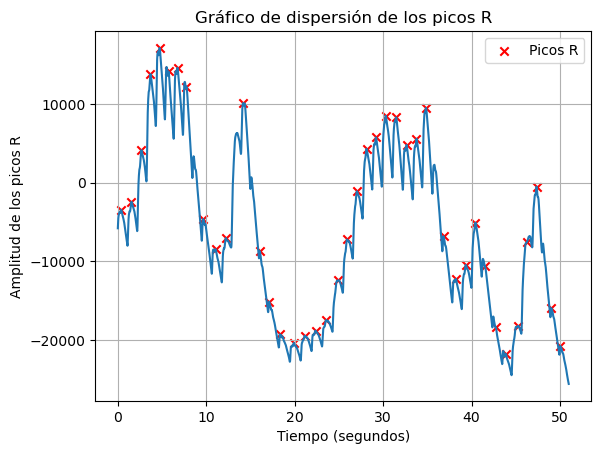

158.95
1.241796875


In [11]:
pleth = signals[0,38,:]
t = np.arange(0, len(pleth)) * (1 / 128)
plt.plot(t,pleth)
# Encontrar picos RR
rr_peaks, _ = find_peaks(pleth,distance=128)
R_ampli = pleth[rr_peaks]

# Crear el gráfico de dispersión
plt.scatter(t[rr_peaks], R_ampli, c='r', marker='x', label='Picos R')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud de los picos R')
plt.title('Gráfico de dispersión de los picos R')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
R_loc_time=rr_peaks / 128
HRV_prueba=np.diff(R_loc_time)
HRV_prueba_prom=np.mean(HRV_prueba)
HRV=np.diff(rr_peaks)
HRV_promedio=np.mean(HRV)
print(HRV_promedio)
print(HRV_prueba_prom)


## 1.3 PATRON DE RESPIRACIÓN
### De esta señal extreremos las siguientes caracteristicas:
- Tasa respiratoria.
- Media de la derivada (variación de la señal de respiración).
- Ritmo respiratorio (centroide espectral).

In [12]:
respiration_Total=[]
for i in range(40):
  respiration = signals[i,37,:]
  peaks, _ = signal.find_peaks(respiration, distance=128)  # Ajusta el umbral según tus datos
  t_respiration = np.diff(peaks)/128  # Calcula la duración entre picos
  respiration_rate = 60 / np.mean(t_respiration)
  respiration_Total.append(respiration_rate)

### 1.3.1 Tasa respiratoria.

In [13]:
for i in range(40):
    respiration = signals[i,37,:]
    peaks, _ = signal.find_peaks(respiration, distance=128)  # Ajusta el umbral según tus datos
    t_respiration = np.diff(peaks)/128  # Calcula la duración entre picos
    respiration_rate = 60 / np.mean(t_respiration)

### 1.3.2 Media de la derivada (variación de la señal de respiración).

In [14]:
for i in range(40):
    respiration = signals[i,39,:]
    respiration_derivada=np.gradient(respiration)
    respiration_derivada_promedio = np.mean(respiration_derivada)

### 1.3.3 Ritmo respiratorio (centroide espectral).

In [15]:
for i in range(40):
    respiration = signals[i,39,:]
    espectro_respiration = abs(rfft(respiration))
    espectro_respiration_normalizado = espectro_respiration / sum(espectro_respiration)
    frecuencias_normalizadas = linspace(0, 1, len(espectro_respiration))
    espectro_central = sum(frecuencias_normalizadas * espectro_respiration_normalizado)

## 1.4 TEMPERATURA DE LA PIEL
### De esta señal extreremos las siguientes caracteristicas:
- Promedio de la señal de temperatura de la piel.
- Promedio de la derivada.
- Potencia espectral en las bandas ([0-0.1]Hz, [0.1-0.2]Hz)

## 1.4.1 Promedio de la señal de temperatura de la piel.

In [16]:
for i in range(40):
    temp = signals[i,39,:]
    temp_media=np.mean(temp)

## 1.4.2 Promedio de la derivada.

In [17]:
for i in range(40):
    temp = signals[i,39,:]
    temp_derivada=np.gradient(temp)
    temp_derivada_promedio = np.mean(temp_derivada)

## 1.4.3 Potencia espectral en las bandas ([0-0.1]Hz, [0.1-0.2]Hz).

## 1.5 Electrooculograma (EOG)

### De esta señal extreremos las siguientes caracteristicas:
- Tasa de parpadeo de los ojos.
- Energía de la señal.
- Media y varianza de la señal.

## 1.5.1 Energia de la señal hEOG.

In [18]:
for i in range(40):
    hEOG = signals[i,32,:]
    energia = np.sum(np.abs(hEOG) ** 2)

## 1.5.2 Media y varianza de la señal hEOG.

In [19]:
for i in range(40):
    hEOG = signals[i,32,:]
    hEOG_media=np.mean(hEOG)
for i in range(40):
    hEOG = signals[i,32,:]
    hEOG_var=np.var(hEOG)

## 1.5.3 Tasa de parpadeo de los ojos en dirección vertical.

In [20]:
for i in range(40):
    vEOG = signals[i,33,:]
    fft_resultado_vEOG = np.fft.fft(vEOG)
    frecuencias = np.fft.fftfreq(len(vEOG))
    picos, _ = find_peaks(np.abs(fft_resultado_vEOG), distance=128)
    tasa_de_parpadeo = len(picos) / (len(vEOG) / 128) * 60

## 1.5.4 Energia de la señal vEOG.

In [21]:
for i in range(40):
    vEOG = signals[i,33,:]
    energia = np.sum(np.abs(vEOG ) ** 2)

### 1.5.5 Media y varianza de la señal vEOG

In [22]:
for i in range(40):
    vEOG = signals[i,33,:]
    vEOG_media=np.mean(vEOG)
for i in range(40):
    vEOG = signals[i,33,:]
    vEOG_var=np.var(vEOG)

### 1.6 Señales Electromiográficas (EMG)

## 1.6.1 Energia de la señal zEMG

In [23]:
for i in range(40):
    zEMG = signals[i,34,:]
    energia = np.sum(np.abs(zEMG) ** 2)

## 1.6.2 Media y varianza de la señal zEMG

In [24]:
for i in range(40):
    zEMG = signals[i,34,:]
    zEMG_media=np.mean(zEMG)
for i in range(40):
    zEMG = signals[i,34,:]
    zEMG_var=np.var(zEMG)

## 1.6.3 Energia de la señal tEMG

In [25]:
for i in range(40):
    tEMG = signals[i,35,:]
    energia = np.sum(np.abs(tEMG) ** 2)

## 1.6.4 Media y varianza de la señal tEMG


In [26]:
for i in range(40):
    tEMG = signals[i,35,:]
    tEMG_media=np.mean(tEMG)
for i in range(40):
    tEMG = signals[i,35,:]
    tEMG_var=np.var(tEMG)

### 1.7 Electroencefalograma (EMG)



*  Espectro de potencia Alpha
*  Espectro de potencia Beta
*  Espectro de potencia Gamma




### 1.7.1 Espectro de potencia Alpha (8 - 12 Hz)

In [27]:
from numpy.lib.polynomial import polyint
Alpha_Total = []
for i in range(40):
    Alpha_C3 = signals[i,6,:] #electrodo C3
    Alpha_C4 = signals[i,24,:] #electrodo C4
    # Definir los parámetros del filtro pasa banda (8-12 Hz)
    frec_corte_baja = 8
    frec_corte_alta = 12
    nyq = 128
    frec_baja = frec_corte_baja / nyq
    frec_alta = frec_corte_alta / nyq
    # Diseñar el filtro pasa banda
    b, a = butter(N=4, Wn=[frec_baja, frec_alta], btype='band')
    # Aplicar el filtro pasa banda a la señal de GSR
    Alpha_C3_filtrada = lfilter(b, a, Alpha_C3) # Inicializar la matriz filtrada
    Alpha_C4_filtrada = lfilter(b, a, Alpha_C4)
    # Calcular la FFT de la señal filtrada
    fft_resultado_Alpha_C3= np.fft.fft(Alpha_C3_filtrada)
    fft_resultado_Alpha_C4= np.fft.fft(Alpha_C4_filtrada)

    frecuencias_Alpha_C3 = np.fft.fftfreq(len(fft_resultado_Alpha_C3), 1/128)
    frecuencias_Alpha_C4 = np.fft.fftfreq(len(fft_resultado_Alpha_C4), 1/128)
    # Calcula las potencias espectrales en la banda de 8 a 12 Hz
    pot_Alpha_C3 = np.abs(fft_resultado_Alpha_C3)**2
    pot_Alpha_C4=np.abs(fft_resultado_Alpha_C4)**2

### 1.7.2 Espectro de potencia Beta (12 - 30 Hz)

In [28]:
for i in range(40):
    Beta_C3 = signals[i,6,:] #electrodo C3
    Beta_C4 = signals[i,24,:] #electrodo C4
    # Definir los parámetros del filtro pasa banda (12-30 Hz)
    frec_corte_baja = 12
    frec_corte_alta = 30
    nyq = 128
    frec_baja = frec_corte_baja / nyq
    frec_alta = frec_corte_alta / nyq
    # Diseñar el filtro pasa banda
    b, a = butter(N=4, Wn=[frec_baja, frec_alta], btype='band')
    # Aplicar el filtro pasa banda a la señal de GSR
    Beta_C3_filtrada = lfilter(b, a, Beta_C3) # Inicializar la matriz filtrada
    Beta_C4_filtrada = lfilter(b, a, Beta_C4)
    # Calcular la FFT de la señal filtrada
    fft_resultado_Beta_C3= np.fft.fft(Beta_C3_filtrada)
    fft_resultado_Beta_C4= np.fft.fft(Beta_C4_filtrada)

    frecuencias_Beta_C3 = np.fft.fftfreq(len(fft_resultado_Beta_C3), 1/128)
    frecuencias_Beta_C4 = np.fft.fftfreq(len(fft_resultado_Beta_C4), 1/128)
    # Calcula las potencias espectrales en la banda de 12 a 30 Hz
    pot_Beta_C3 = np.abs(fft_resultado_Beta_C3)**2
    pot_Beta_C4=np.abs(fft_resultado_Beta_C4)**2

### 1.7.3 Espectro de potencia Alpha Gamma (30 - 100 Hz)


In [29]:
for i in range(40):
    Gamma_C3 = signals[i,6,:] #electrodo C3
    Gamma_C4 = signals[i,24,:] #electrodo C4
    # Definir los parámetros del filtro pasa banda (30-100Hz)
    frec_corte_baja = 30
    frec_corte_alta = 100
    nyq = 128
    frec_baja = frec_corte_baja / nyq
    frec_alta = frec_corte_alta / nyq
    # Diseñar el filtro pasa banda
    b, a = butter(N=4, Wn=[frec_baja, frec_alta], btype='band')
    # Aplicar el filtro pasa banda a la señal de GSR
    Gamma_C3_filtrada = lfilter(b, a, Gamma_C3) # Inicializar la matriz filtrada
    Gamma_C4_filtrada = lfilter(b, a, Gamma_C4)
    # Calcular la FFT de la señal filtrada
    fft_resultado_Gamma_C3= np.fft.fft(Gamma_C3_filtrada)
    fft_resultado_Gamma_C4= np.fft.fft(Gamma_C4_filtrada)

    frecuencias_Gamma_C3 = np.fft.fftfreq(len(fft_resultado_Gamma_C3), 1/128)
    frecuencias_Gamma_C4 = np.fft.fftfreq(len(fft_resultado_Gamma_C4), 1/128)
    # Calcula las potencias espectrales en la banda de 30 a 100 Hz
    pot_Gamma_C3 = np.abs(fft_resultado_Gamma_C3)**2
    pot_Gamma_C4=np.abs(fft_resultado_Gamma_C4)**2

## Creación del DataFream

In [30]:
def caracterizadorDEAP(xGSR,pleth_Total): #funcion donde caracteriza y concardena los vectores
    # Asegura que todos los elementos de nuevo_vector sean arrays 1D
    #xGSR = [np.array(elem).ravel() if isinstance(elem, np.ndarray) else elem for elem in xGSR]
    #xTemp = [np.array(elem).ravel() if isinstance(elem, np.ndarray) else elem for elem in xTemp]

    # Convierte nuevo_vector a un array de NumPy y aplica reshape para asegurar que sea compatible
    #xGSR = np.array(xGSR).reshape(40, -1)
    #xTemp = np.array(xTemp).reshape(40, -1)

    # Concatena todos los datos en un solo array
    xTrial = np.hstack((xGSR,pleth_Total))
    return xTrial

# Llama a la función caracterizadorDEAP con nuevo_vector
xTrial = caracterizadorDEAP(GSR_signal,pleth_Total)
#Se crea el dataFrame
dataFrame_P1 = pd.DataFrame(xTrial)
# Cambiar nombres de las columnas usando rename
nuevos_nombres = ['Promedio GSR','Minimos locales GSR','Pot 1 GSR ','Pot 2 GSR ','Pot 3 GSR ','Pot 4 GSR ','Pot 5 GSR ','Pot 6 GSR ','Pot 7 GSR ','Pot 8 GSR ','Pot 9 GSR ','Pot 10 GSR ','Freq 1 GSR ','Freq 2 GSR ','Freq 3 GSR ','Freq 4 GSR ','Freq 5 GSR ','Freq 6 GSR ','Freq 7 GSR ','Freq 8 GSR ','Freq 9 GSR ','Freq 10 GSR ','Media Pleth','Desviacion Estandar Pleth','Pot Pleth', 'HRV [seg]']
dataFrame_P1.columns = nuevos_nombres
dataFrame_P1

,Promedio GSR,Minimos locales GSR,Pot 1 GSR,Pot 2 GSR,Pot 3 GSR,Pot 4 GSR,Pot 5 GSR,Pot 6 GSR,Pot 7 GSR,Pot 8 GSR,...,Freq 5 GSR,Freq 6 GSR,Freq 7 GSR,Freq 8 GSR,Freq 9 GSR,Freq 10 GSR,Media Pleth,Desviacion Estandar Pleth,Pot Pleth,HRV [seg]
0,-18005.683435,13.0,1.288732e+16,1.772414e+15,1.772414e+15,1.277566e+15,1.277566e+15,2.953486e+14,2.953486e+14,1.561644e+14,...,-0.039216,-0.098039,0.098039,0.058824,-0.058824,0.156863,-6475.255045,10645.044431,6.333898e+10,1.241797
1,-8794.650746,16.0,3.088293e+15,9.539942e+14,9.539942e+14,3.975770e+14,3.975770e+14,8.871423e+13,8.871423e+13,4.261550e+13,...,0.039216,0.058824,-0.058824,0.098039,-0.098039,-0.117647,746.419893,11274.602648,2.854003e+10,1.206936
2,-1331.408630,19.0,1.058006e+14,1.058006e+14,7.315040e+13,1.053249e+13,1.053249e+13,2.117346e+12,2.117346e+12,1.261785e+12,...,-0.039216,0.137255,-0.137255,0.058824,-0.058824,-0.156863,-3267.157319,6212.781286,1.006946e+10,1.241797
3,3491.283824,15.0,4.960742e+14,1.930184e+14,1.930184e+14,3.658948e+13,3.658948e+13,2.216112e+13,2.216112e+13,1.344724e+13,...,-0.039216,0.058824,-0.058824,-0.078431,0.078431,0.117647,4131.801635,12654.408886,2.630753e+10,1.230273
4,-3736.386024,23.0,5.624871e+14,1.634305e+14,1.634305e+14,2.865608e+13,2.865608e+13,2.051458e+13,2.051458e+13,1.858104e+13,...,-0.019608,0.156863,-0.156863,-0.098039,0.098039,-0.078431,17771.636865,9911.574340,1.013986e+10,1.202195
5,-848.909184,18.0,2.176504e+14,2.176504e+14,4.145656e+13,4.145656e+13,3.112495e+13,1.529163e+13,1.529163e+13,1.214382e+13,...,0.000000,0.058824,-0.058824,-0.078431,0.078431,-0.098039,4661.397132,6726.808636,4.888700e+09,1.230945
6,-8999.583679,14.0,3.242403e+15,3.161277e+14,3.161277e+14,2.475251e+14,2.475251e+14,5.683366e+13,5.683366e+13,3.571450e+13,...,0.058824,-0.078431,0.078431,0.156863,-0.156863,-0.176471,6626.848062,8383.345295,1.370405e+10,1.254102
7,-517.923350,16.0,1.434118e+14,1.434118e+14,4.168477e+13,4.168477e+13,3.556266e+13,3.556266e+13,9.056979e+12,6.917783e+12,...,-0.058824,0.058824,0.000000,-0.156863,0.156863,0.078431,23395.457615,12148.643808,3.670545e+10,1.161519
8,-9165.069658,11.0,3.384431e+15,3.580135e+14,3.580135e+14,2.411739e+14,2.411739e+14,1.334591e+14,1.334591e+14,3.541100e+13,...,-0.058824,-0.039216,0.039216,-0.117647,0.117647,-0.137255,-1927.175813,13222.155925,2.873898e+10,1.199405
9,5519.865947,21.0,1.223366e+15,8.333986e+13,8.333986e+13,5.791666e+13,5.791666e+13,2.529939e+13,2.529939e+13,1.275095e+13,...,0.039216,0.058824,-0.058824,0.098039,-0.098039,-0.156863,2963.455709,9785.425747,2.137539e+10,1.210366


## Conclusiones